### Analysis:

* Ride service has more demand in the Urban area, followed by Suburban. With least demand in Rural.
* Ride cost more in Rural followed by Suburban.
* More drivers on road in Urban area than S



In [29]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = city_data.merge(ride_data, on="city")
combined_data = combined_data[["city", "date", "fare", "ride_id", "driver_count", "type"]]

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [30]:
# Group the combined data by City Type and City
grouped_data = combined_data.groupby(["type", "city"])

# Calculate required data
avg_fare = grouped_data["fare"].mean()
total_rides = grouped_data["ride_id"].count()
total_drivers = grouped_data["driver_count"].mean()

# Create data frame with the calculated values
scatter_plot_df = pd.DataFrame({"Average Fare" : avg_fare, "Total Rides" : total_rides,
                               "Total Drivers" : total_drivers })
scatter_plot_df.reset_index()

,type,city,Average Fare,Total Rides,Total Drivers
0,Rural,Bradshawfurt,40.064000,10,7
1,Rural,Garzaport,24.123333,3,7
2,Rural,Harringtonfort,33.470000,6,4
3,Rural,Jessicaport,36.013333,6,1
4,Rural,Lake Jamie,34.358333,6,4
5,Rural,Lake Latoyabury,26.061818,11,2
6,Rural,Michaelberg,34.997500,12,6
7,Rural,New Ryantown,43.278333,6,2
8,Rural,Newtonview,36.745000,4,1
9,Rural,North Holly,29.130000,9,8


## Bubble Plot of Ride Sharing Data

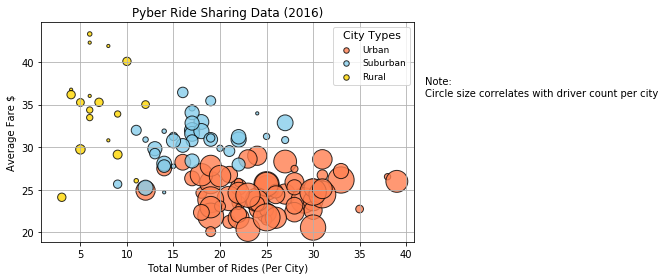

In [32]:
# Obtain the x and y coordinates for each of the three city types
x1 = scatter_plot_df.loc[["Urban"], ["Total Rides"]]
y1 = scatter_plot_df.loc[["Urban"], ["Average Fare"]]
s1 = scatter_plot_df.loc[["Urban"], ["Total Drivers"]]
x2 = scatter_plot_df.loc[["Suburban"], ["Total Rides"]]
y2 = scatter_plot_df.loc[["Suburban"], ["Average Fare"]]
s2 = scatter_plot_df.loc[["Suburban"], ["Total Drivers"]]
x3 = scatter_plot_df.loc[["Rural"], ["Total Rides"]]
y3 = scatter_plot_df.loc[["Rural"], ["Average Fare"]]
s3 = scatter_plot_df.loc[["Rural"], ["Total Drivers"]]

# Build the scatter plots for each city types
fig, ax = plt.subplots()
ax1 = plt.scatter(x1, y1, s1.multiply(10), c='coral', alpha='0.8', edgecolors='black', label='Urban')
ax2 = plt.scatter(x2, y2, s2.multiply(10), c='skyblue', alpha='0.8', edgecolors='black', label='Suburban')
ax3 = plt.scatter(x3, y3, s3.multiply(10), c='gold', alpha='0.8', edgecolors='black', label='Rural')


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.grid()
fig.tight_layout()

# Create a legend
lgnd = plt.legend(fontsize=9, title='City Types', title_fontsize=11 )
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 36, "Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("Images/Ride_Data_Scatter_Plot.png")


In [33]:
# Show plot
plt.show()

## Total Fares by City Type

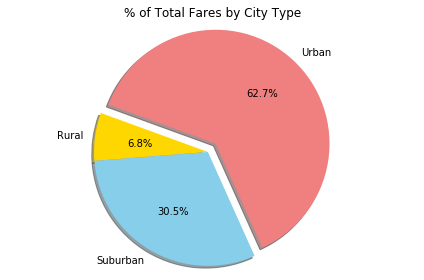

In [34]:
# Calculate Type Percents
grouped_by_type = combined_data.groupby("type")
total_fares = grouped_by_type["fare"].sum()

# Build Pie Chart
explode = (0, 0, 0.10)
colors = ['gold', 'skyblue', 'lightcoral']
fares_pie_chart = total_fares.plot.pie(y=total_fares, colors= colors, shadow=True,
                                       explode=explode, autopct="%1.1f%%", startangle=160) 

fares_pie_chart.axes.get_yaxis().set_visible(False)
plt.title('% of Total Fares by City Type')
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("Images/TotalFare_Pie.png")


In [35]:
# Show Figure
plt.show()

## Total Rides by City Type

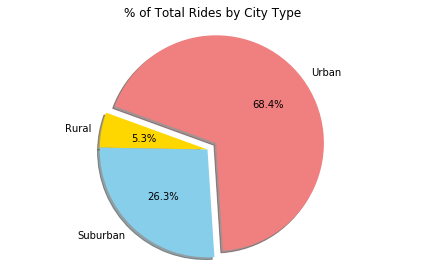

In [36]:
# Calculate Ride Percents
total_rides = grouped_by_type["ride_id"].count()

# Build Pie Chart
labels = total_rides.index.tolist()
ride_count = total_rides.values.tolist()
explode = (0, 0, 0.10)
colors = ['gold', 'skyblue', 'lightcoral']

plt.pie(ride_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Rides by City Type')
plt.axis("equal")
plt.tight_layout()


# Save Figure
plt.savefig("Images/TotalRides_Pie.png")

In [37]:
# Show Figure
plt.show()

## Total Drivers by City Type

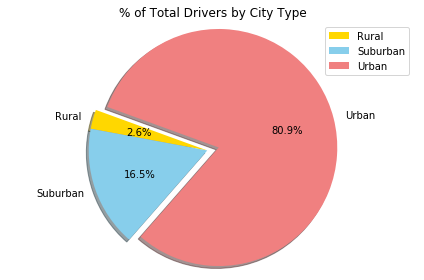

In [38]:
# Calculate Driver Percents
total_drivers_by_type = total_drivers.groupby("type").sum()
total_drivers_df = total_drivers_by_type.to_frame()

# Build Pie Charts
explode = (0, 0, 0.10)
colors = ['gold', 'skyblue', 'lightcoral']
drivers_pie_chart = total_drivers_df.plot.pie(y='driver_count', explode=explode, colors=colors,
                           autopct="%1.1f%%", shadow=True, startangle=160)

drivers_pie_chart.axes.get_yaxis().set_visible(False)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")
plt.legend(loc=1)
plt.tight_layout()

# Save Figure
plt.savefig("Images/TotalDrivers_Pie.png")

In [39]:
# Show Figure
plt.show()